In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA # 1. Choose the model class
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/carlson9/KocPythonFall2021/main/inclass/10ML/cses4_cut.csv'

mydata = pd.read_csv(url)

In [3]:
mydata = mydata.drop(columns=["Unnamed: 0"])

In [4]:
mydata.info() #we control wheter cathegorical nominal features exist or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 32 columns):
D2002    12451 non-null int64
D2003    12451 non-null int64
D2004    12451 non-null int64
D2005    12451 non-null int64
D2006    12451 non-null int64
D2007    12451 non-null int64
D2008    12451 non-null int64
D2009    12451 non-null int64
D2010    12451 non-null int64
D2011    12451 non-null int64
D2012    12451 non-null int64
D2013    12451 non-null int64
D2014    12451 non-null int64
D2015    12451 non-null int64
D2016    12451 non-null int64
D2017    12451 non-null int64
D2018    12451 non-null int64
D2019    12451 non-null int64
D2020    12451 non-null int64
D2021    12451 non-null int64
D2022    12451 non-null int64
D2023    12451 non-null int64
D2024    12451 non-null int64
D2025    12451 non-null int64
D2026    12451 non-null int64
D2027    12451 non-null int64
D2028    12451 non-null int64
D2029    12451 non-null int64
D2030    12451 non-null int64
D2031    12451 non-nu

In [ ]:
#1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
#2. Choose model hyperparameters by instantiating this class with desired values.
#3. Arrange data into a features matrix and target vector following the discussion from before.
#4. Fit the model to your data by calling the fit() method of the model instance.
#5. Apply the model to new data:
#    • For supervised learning, often we predict labels for unknown data using the predict() method.
#    • For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

    D2001_M      >>> D01a    DATE OF BIRTH OF RESPONDENT - MONTH
    D2001_Y      >>> D01b    DATE OF BIRTH OF RESPONDENT - YEAR
    D2002        >>> D02     GENDER
    D2003        >>> D03     EDUCATION
    D2004        >>> D04     MARITAL STATUS
    D2005        >>> D05     UNION MEMBERSHIP OF RESPONDENT
    D2006        >>> D06     UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD
    D2007        >>> D07     BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP
    D2008        >>> D08     FARMERS' ASSOCIATION MEMBERSHIP
    D2009        >>> D09     PROFESSIONAL ASSOCIATION MEMBERSHIP
    D2010        >>> D10     CURRENT EMPLOYMENT STATUS
    D2011        >>> D11     MAIN OCCUPATION
    D2012        >>> D12     SOCIO ECONOMIC STATUS
    D2013        >>> D13     EMPLOYMENT TYPE - PUBLIC OR PRIVATE
    D2014        >>> D14     INDUSTRIAL SECTOR
    D2015        >>> D15     SPOUSE: CURRENT EMPLOYMENT STATUS
    D2016        >>> D16     SPOUSE: OCCUPATION
    D2017        >>> D17     SPOUSE: SOCIO ECONOMIC STATUS
    D2018        >>> D18     SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE
    D2019        >>> D19     SPOUSE: INDUSTRIAL SECTOR
    D2020        >>> D20     HOUSEHOLD INCOME
    D2021        >>> D21a    NUMBER IN HOUSEHOLD IN TOTAL
    D2022        >>> D21b    NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18
    D2023        >>> D21c    NUMBER IN HOUSEHOLD UNDER AGE 6
    D2024        >>> D22     RELIGIOUS SERVICES ATTENDANCE
    D2025        >>> D23     RELIGIOSITY
    D2026        >>> D24     RELIGIOUS DENOMINATION
    D2027        >>> D25     LANGUAGE USUALLY SPOKEN AT HOME
    D2028        >>> D26     REGION OF RESIDENCE
    D2029        >>> D27     RACE
    D2030        >>> D28     ETHNICITY
    D2031        >>> D29     RURAL OR URBAN RESIDENCE
    D2032        >>> D30     PRIMARY ELECTORAL DISTRICT
    D2033        >>> D31     COUNTRY OF BIRTH
    D2034        >>> D32     YEAR ARRIVED IN CURRENT COUNTRY

In [5]:
def encode(x):
    if x == True:
        return 1
    else:
        return 0

In [6]:
mydata["voted"] = mydata.apply(lambda x: encode(x["voted"]), axis = 1)

In [7]:
X = mydata.drop(columns=['voted'])
y = mydata['voted']

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,  y, test_size=0.4, random_state=0)

In [9]:
model = RandomForestClassifier(random_state=0)

In [10]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_RF = GridSearchCV(estimator=model, param_grid=grid, cv= 5)
CV_RF.fit(Xtrain, ytrain)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [11]:
print(CV_RF.best_score_)

print(CV_RF.best_params_)


0.8583668005354752
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [12]:
model2 = CV_RF.best_estimator_
model2.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
pred=model2.predict(Xtest)
print("Accuracy for Random Forest: ",accuracy_score(ytest,pred))

Accuracy for Random Forest:  0.8652880947600884


In [15]:

print(metrics.classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.29      0.79      0.43       317
           1       0.98      0.87      0.92      4664

    accuracy                           0.87      4981
   macro avg       0.64      0.83      0.68      4981
weighted avg       0.94      0.87      0.89      4981



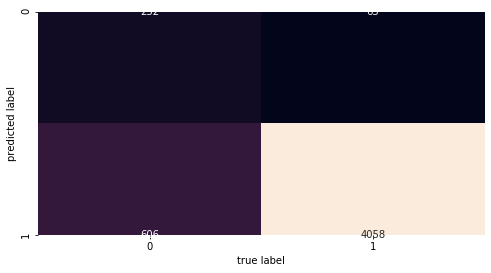

In [17]:
#confusion matrix

plt.figure(figsize=(8, 8))
mat = confusion_matrix(ytest, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [50]:
#Model validation via cross-validation
ytest_model = model2.fit(Xtrain, ytrain).predict(Xtest)
ytrain_model = model2.fit(Xtest, ytest).predict(Xtrain)
print("for the train datasets:",accuracy_score(ytrain, ytrain_model))
print("for the test datasets:",accuracy_score(ytest, ytest_model))

for the train datasets: 0.8568942436412316
for the test datasets: 0.8652880947600884


In [34]:
model3 = PCA(n_components=10) # 2. Instantiate the model with hyperparameters
model3.fit(X) # 3. Fit to data. Notice y is not specified!
X_10 = model3.transform(X) # 4. Transform the data to two dimensions

In [35]:
model4 = PCA(n_components=20) # 2. Instantiate the model with hyperparameters
model4.fit(X) # 3. Fit to data. Notice y is not specified!
X_20 = model4.transform(X) # 4. Transform the data to two dimensions

In [36]:
Xtrain_10, Xtest_10, ytrain_10, ytest_10 = train_test_split(X_10,  y, test_size=0.4, random_state=0)
Xtrain_20, Xtest_20, ytrain_20, ytest_20 = train_test_split(X_20,  y, test_size=0.4, random_state=0)

In [37]:
grid_10 = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_RF_10 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_10, cv= 5)
CV_RF_10.fit(Xtrain_10, ytrain_10)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [44]:
print(CV_RF.best_score_)

print(CV_RF.best_params_)
model3 = CV_RF_10.best_estimator_
model3.fit(Xtrain_10, ytrain_10)
pred_10=model3.predict(Xtest_10)
print("Accuracy for Random Forest: ",accuracy_score(ytest,pred))

0.8583668005354752
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Accuracy for Random Forest:  0.8646858060630396


In [39]:
grid_20 = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_RF_20 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_20, cv= 5)
CV_RF_20.fit(Xtrain_20, ytrain_20)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [40]:
print(CV_RF_20.best_score_)

print(CV_RF_20.best_params_)
model4 = CV_RF_20.best_estimator_
model4.fit(Xtrain_20, ytrain_20)
pred_20=model4.predict(Xtest_20)
print("Accuracy for Random Forest: ",accuracy_score(ytest_20,pred_20))

0.8511378848728246
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy for Random Forest:  0.8586629190925517


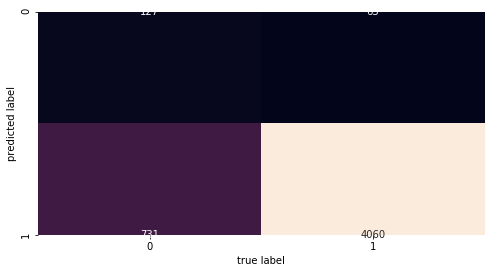

In [45]:
#Since we get better results at PCA Test for n_components=10 , we apply the confusion matrix and cross validation for these datasets.
#confusion matrix
plt.figure(figsize=(8, 8))
mat = confusion_matrix(ytest_10, pred_10)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
#Model validation via cross-validation
ytest_model3 = model3.fit(Xtrain_10, ytrain_10).predict(Xtest_10)
ytrain_model3 = model3.fit(Xtest_10, ytest_10).predict(Xtrain_10)
print("for the train datasets:",accuracy_score(ytrain_10, ytrain_model3)) 
print("for the test datasets:",accuracy_score(ytest_10, ytest_model3))

for the train datasets: 0.8306559571619813
for the test datasets: 0.8413973097771532
